1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [16]:
# Import for the whole program
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import pickle as pkl
import scipy
##

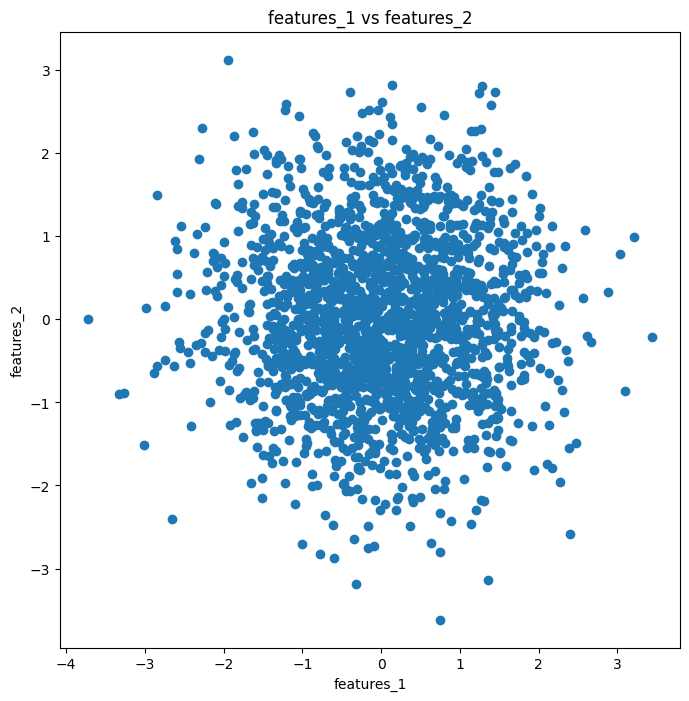

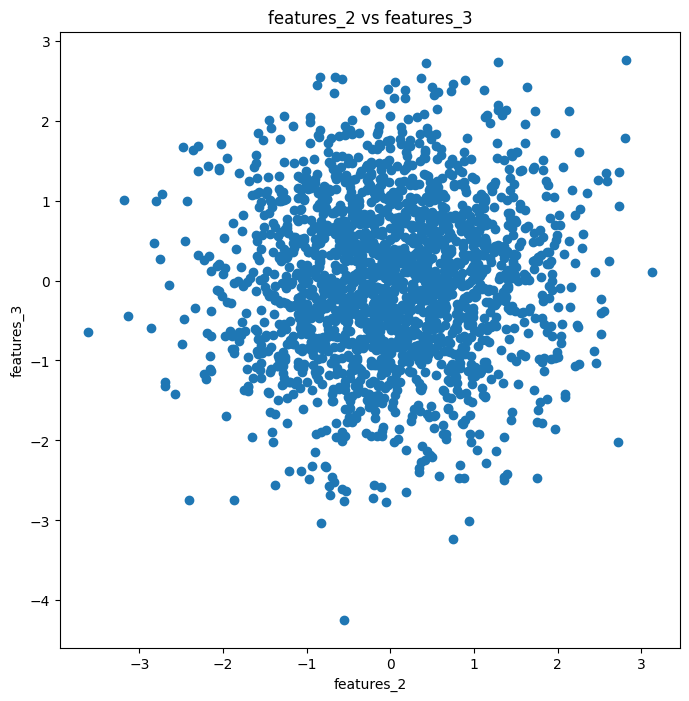

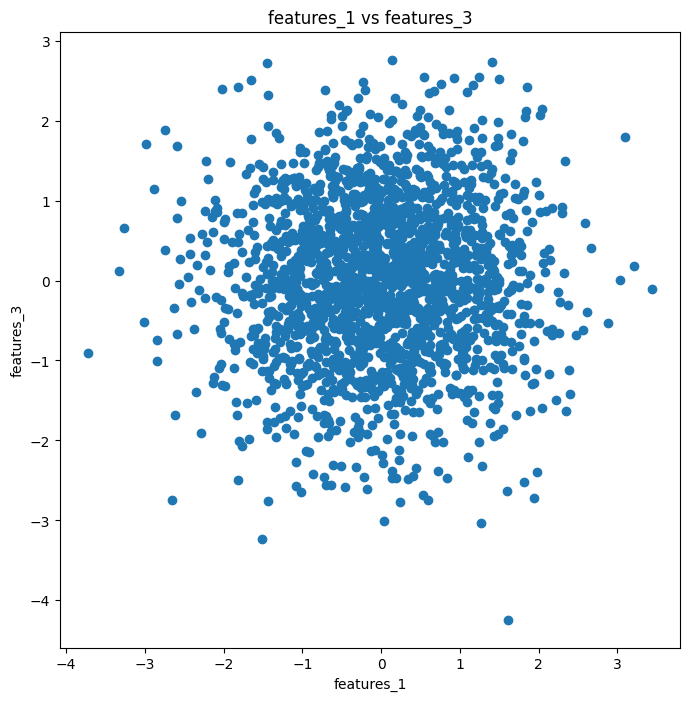

In [5]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
df = pd.read_csv('data/regression_generated.csv')
#print(df)
X = df.features_1
Y = df.features_2
Z = df.features_3

fig1 = plt.figure(num="Figure 1", figsize=(8, 8))
plt.scatter(X, Y)
plt.title('features_1 vs features_2')
plt.xlabel("features_1")
plt.ylabel("features_2")
plt.show()

fig2 = plt.figure(num="Figure 2", figsize=(8, 8))
plt.scatter(Y, Z)
plt.title('features_2 vs features_3')
plt.xlabel("features_2")
plt.ylabel("features_3")
plt.show()

fig3 = plt.figure(num="Figure 3", figsize=(8, 8))
plt.scatter(X, Z)
plt.title('features_1 vs features_3')
plt.xlabel("features_1")
plt.ylabel("features_3")
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [7]:
#from IPython.display import Image
#Image('images/two_categories_scatter_plot.png')

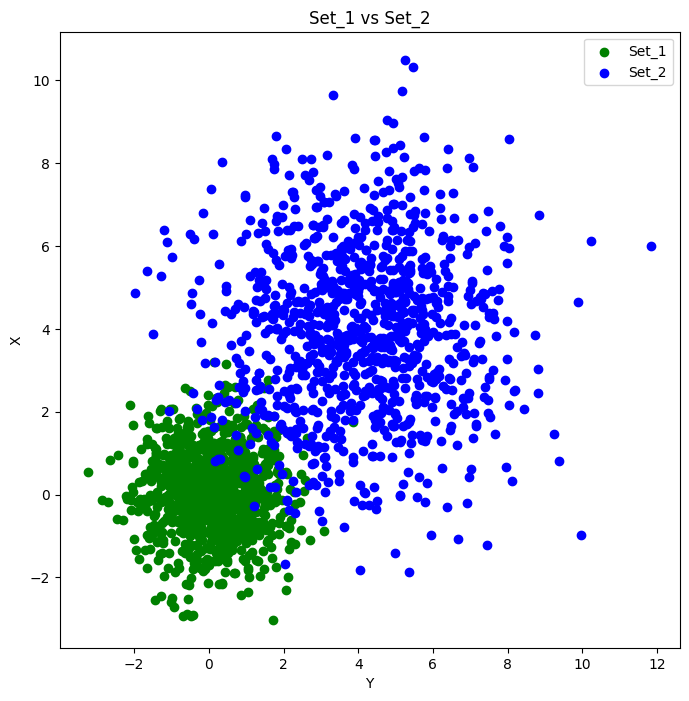

In [8]:
# vector of normal distributed elemnts
mu1, sigma1, size1 = 0, 1, 1000 # mean and standard deviation size
s1_x = np.random.normal(mu1, sigma1, size1)
s1_y = np.random.normal(mu1, sigma1, size1)
mu2, sigma2, size2 = 4, 2, 1000 # mean and standard deviation size
s2_x = np.random.normal(mu2, sigma2, size2)
s2_y = np.random.normal(mu2, sigma2, size2)

fig4 = plt.figure(num="Figure 4", figsize=(8, 8))
plt.scatter(s1_x, s1_y, color="green")
plt.scatter(s2_x, s2_y, color="blue")
plt.title('Set_1 vs Set_2')
plt.xlabel("Y")
plt.ylabel("X")
plt.legend(["Set_1", "Set_2"])
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


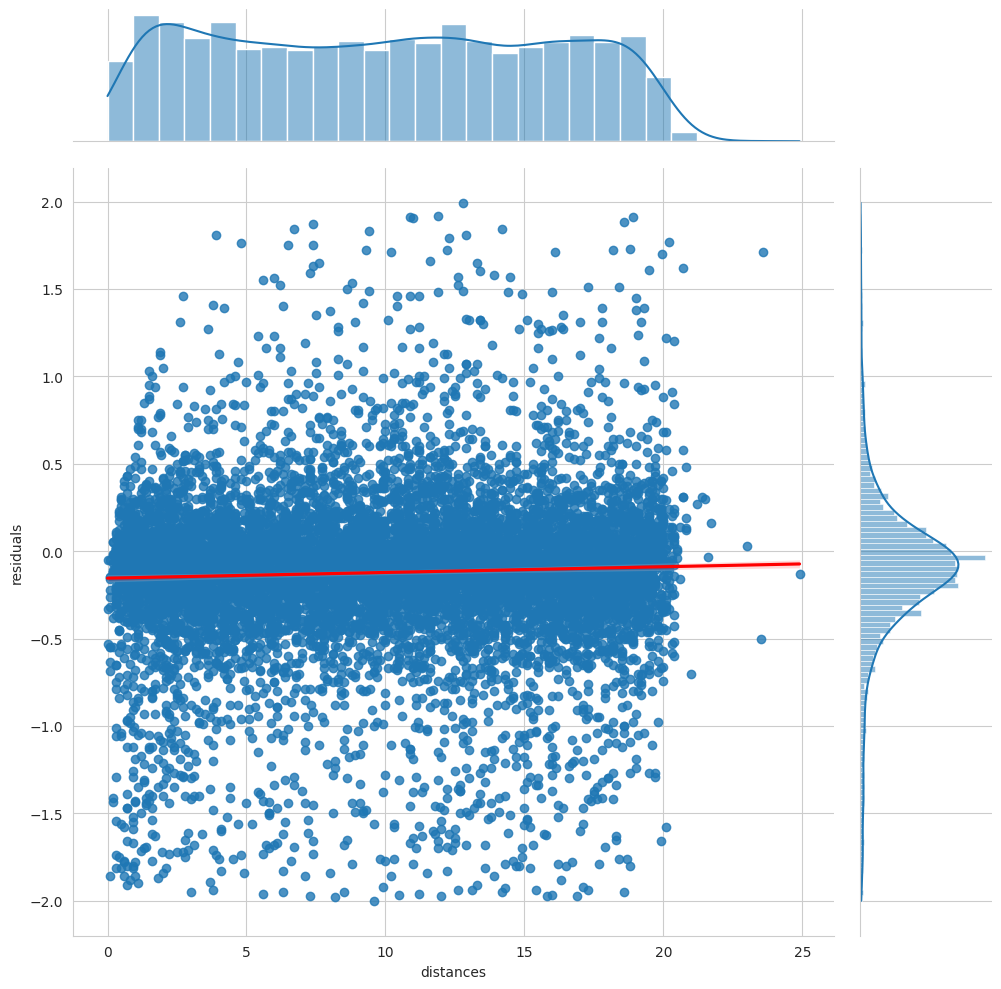

In [11]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
# Read the pkl file
data = pd.read_pickle('data/residuals_261.pkl').tolist()
#print(type(data))
# Convert to data Frame
df = pd.DataFrame(data)
#print(df)
# filter the entries (rows) with the absolute values of the variable "residual" smaller than 2
df = df[ abs(df['residuals']) < 2]
print(df)

# print the seaborn
import seaborn as sns

sns.jointplot(data=df, x='distances', y='residuals', kind="reg", height=10, joint_kws={"line_kws":{"color": "r"}}) 

#sns.jointplot(x="residuals", y="distances", data = df)

# Linear regression
sns.set_style('whitegrid')

#sns.lmplot(y ='residuals', x ='distances', data = df, line_kws={'color': 'red'})

# Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.


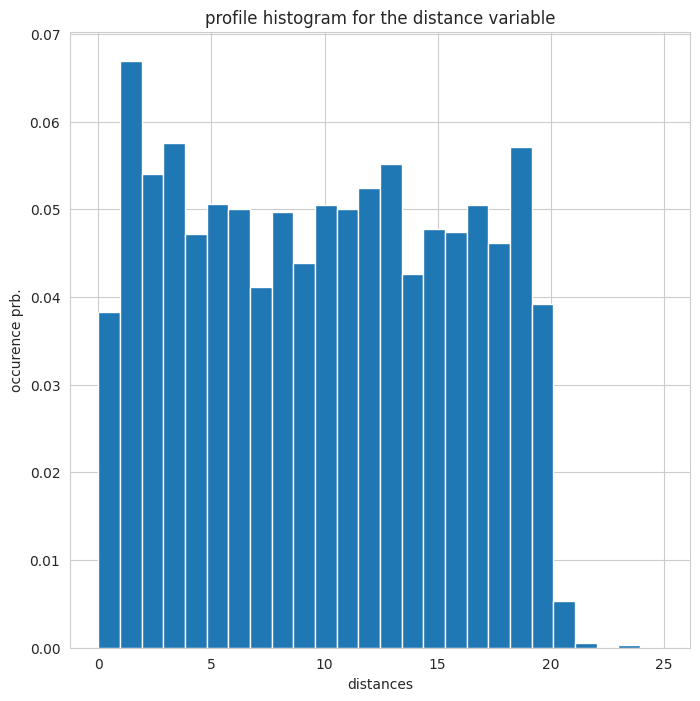

In [12]:
#There are many methods defining the number of bins. Here is used Freedman-Diaconis (FD) Rule
iqr = np.percentile(df['distances'], 75) - np.percentile(df['distances'], 25)
bin_width_fd = 2 * iqr / len(df['distances'])**(1/3)
binNumber = int((np.max(df['distances']) - np.min(df['distances'])) / bin_width_fd)

#Number of bins according to the FD rule is 26

fig7 = plt.figure(num="Figure 7", figsize=(8, 8))
n, bins, _ = plt.hist(df['distances'], bins=binNumber, density=True, cumulative=False)
# Returned: n -> values of the bins
#		 bins -> edges of the bins 
plt.title('profile histogram for the distance variable')
plt.xlabel("distances")
plt.ylabel("occurence prb.")
plt.show()

x = np.fromfunction(lambda i, j: bins[i]+(bins[i+1]-bins[i])/2, (len(bins)-1, 1), dtype=int)

# define lamda functio for computing y
h_med = lambda i, j: df['residuals'].loc[(df['distances'] >= bins[i]) & (df['distances'] < bins[i+1])].mean()
h_std = lambda i, j: df['residuals'].loc[(df['distances'] >= bins[i]) & (df['distances'] < bins[i+1])].std()
#print(h_med(0, 0))


# Compute the y using h_med function
y = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
	y[i] = h_med(i, 0)
	#print(h_med(i, 0))

# Compute the y_err using h_std function
y_err = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
	y_err[i] = h_std(i, 0)
	#print(h_std(i, 0))


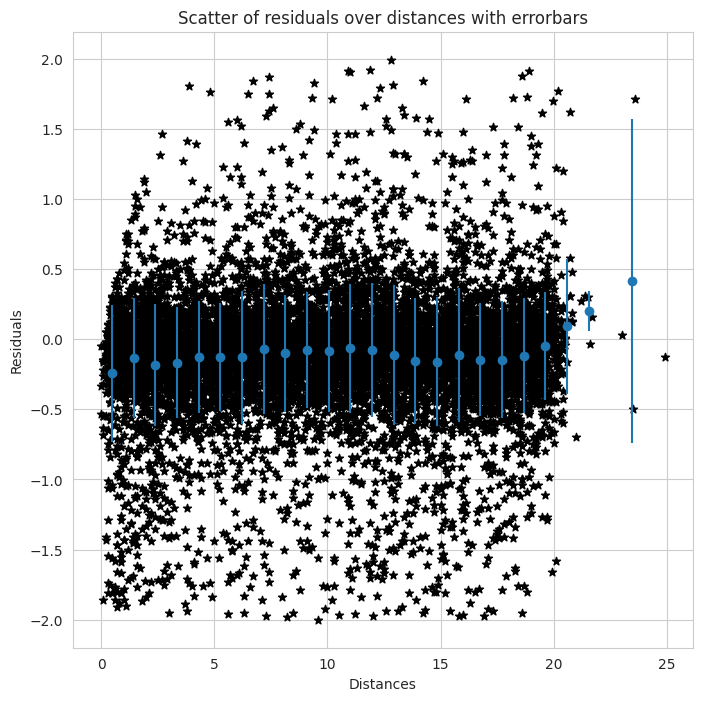

In [13]:

fig8 = plt.figure(num="Figure 8", figsize=(8, 8))
plt.scatter(x=df['distances'],y=df['residuals'],marker='*',color='black')
plt.errorbar(x, y, yerr=y_err,fmt='o')
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Scatter of residuals over distances with errorbars')
plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


x: [ 7.49014246  5.5852071   7.94306561 10.56908957  5.29753988  5.29758913
 10.73763845  8.30230419  4.59157684  7.62768013  4.60974692  4.60281074
  6.72588681  0.26015927  0.8252465   4.31313741  2.96150664  6.942742
  3.27592777  1.7630889  10.39694631  5.3226711   6.20258461  1.72575544
  4.36685183  6.33276777  2.54701927  7.12709406  4.19808393  5.12491875
  4.19488016 11.55683455  5.95950833  2.82686721  8.46763474  2.33746905
  6.62659079  0.12098963  2.01544185  6.59058371  8.21539974  6.51410484
  5.65305515  5.09668891  1.56443403  3.84046737  4.61808369  9.17136668
  7.03085487  0.71087953  6.97225191  4.84475316  3.969234    7.83502887
  9.09299857  8.79384036  3.48234743  5.07236287  6.99379029  8.92663538
  4.56247729  5.44302307  2.68099508  2.41138013  8.43757747 10.06872009
  5.78396964  9.01059869  7.08490808  4.06464074  7.08418682 10.6141097
  5.89252188 10.69393097 -1.85923531  8.46570751  6.2611412   5.10297795
  6.27528233  0.03729326  5.34098434  7.07133771 10

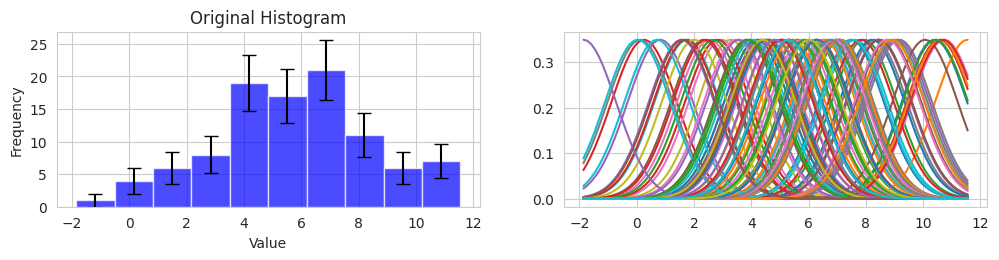

gs [ 0.64252002  0.7121082   0.78917002  0.87471791  0.96968346  1.07484187
  1.19074368  1.31766154  1.45555829  1.60408033  1.76257748  1.93014729
  2.10569888  2.28802946  2.47590541  2.66814002  2.8636613   3.0615656
  3.26115563  3.46196424  3.66376782  3.86659431  4.0707313   4.27673797
  4.48546264  4.69806416  4.91603209  5.14119764  5.37572534  5.62207494
  5.88292487  6.16105144  6.45916348  6.77969758  7.12458607  7.49501495
  7.891194    8.31216304  8.75565794  9.21805663  9.69441892 10.17862596
 10.66361502 11.14169557 11.60492336 12.04550225 12.45617972 12.83060125
 13.16359287 13.45134763 13.6915021  13.88310035 14.02645491 14.12292487
 14.17463951 14.1842009  14.1543991  14.0879704  13.98742144 13.85493246
 13.69234136 13.50119969 13.28288237 13.03872707 12.77017687 12.47890184
 12.16688035 11.83642908 11.49017962 11.13100845 10.76193387 10.38599766
 10.00614985  9.6251523   9.24551168  8.86944546  8.49887782  8.13545675
  7.78058002  7.4354175   7.10091932  6.77780442 

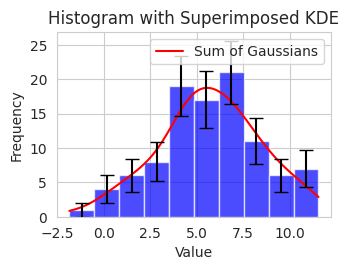

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

# Step 1: Generate normally distributed dataset
np.random.seed(42)
N = 100
mean = 6
std_dev = 3
x = np.random.normal(mean, std_dev, N)
print("x:",x)
# Step 2: Create histogram with Poisson uncertainty

# Number of bins can be taken as root of 100 which is 10.
hist, bin_edges = np.histogram(x, bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
poisson_err = np.sqrt(hist)

# Plot the histogram
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
plt.bar(bin_centers, hist, width=np.diff(bin_edges), align='center', yerr=poisson_err, capsize=5, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Original Histogram')

# Step 3: Generate Gaussian functions for each data point
std_dev_default = 1.06 * x.std() * np.power(x.size, -1 / 5) 

data_linspace = np.linspace(x.min(),x.max(),len(x))

# creating the gaussian distribution of each x
distributions = [scipy.stats.norm.pdf(data_linspace, loc=m, scale=std_dev_default) for m in x]
plt.subplot(2, 2, 2)
for d in distributions:
    plt.plot(data_linspace, d)
plt.show()
# Step 4: Sum all Gaussian functions and normalize
gaussian_sum = np.sum(distributions, axis=0)

print("gs",gaussian_sum)
integral_gaussian_sum = trapz(gaussian_sum, data_linspace)
normalized_gaussian_sum = gaussian_sum / integral_gaussian_sum * trapz(hist, bin_centers)


print(normalized_gaussian_sum)
# Step 5: Superimpose the normalized sum on the original histogram
plt.subplot(2, 2, 3)
#print("X,Y",len(data_linspace), len(scipy.stats.norm.pdf(data,mean,std_dev_default)*integral_gaussian_sum))
#plt.plot(data_linspace, scipy.stats.norm.pdf(data,mu,sigma)*histogramArea, label = "Distribution")
#plt.plot(data_linspace, normalized, label="Kernel density est.")

print(len(distributions))
#plt.bar(data_linspace[1;-1;10], hist, width=np.diff(bin_edges), align='center', yerr=poisson_err, capsize=5, color='blue', alpha=0.7, label="Original Histogram")
plt.plot(data_linspace, normalized_gaussian_sum, color='red', label='Sum of Gaussians')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Superimposed KDE')

plt.bar(bin_centers, hist, width=np.diff(bin_edges), align='center', yerr=poisson_err, capsize=5, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
